### Objectif

Prédire si une personne est infecté en fonction de ces données cliniques

### EDA

#### Analyse de forme

In [10]:
import pandas as pd
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

covid = pd.read_excel('dataset.xlsx')
covid.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result   
0  44477f75e8169d2                    13               negative  \
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)   
0                                               0  \
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)   
0                                                  0      \
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit   
0                                                  0             NaN  \
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes   
0         NaN        NaN                    NaN              NaN          NaN  \
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils   
0                                               NaN         NaN        NaN  \
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils   
0                                NaN          NaN  \
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes   
0                            NaN        NaN  \
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose   
0                                      NaN            NaN  \
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1   
0                         NaN           NaN           NaN             NaN  \
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae   
0             NaN                    

In [5]:
# Copy de notre data
df = covid.copy()
df

Patient ID  Patient age quantile SARS-Cov-2 exam result   
0     44477f75e8169d2                    13               negative  \
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)   
0                                                  0  \
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)   
0                                                     0      \
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit   
0                                                     0             NaN  \
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...   
0            NaN        NaN                    NaN  ...  \
1      -0.022340  -0.517413               0.010677  ...   
2            NaN        NaN                    NaN  ...   
3            NaN        NaN                    NaN  ...   
4            NaN        NaN                    NaN  ...   
...          ...        ...                    ...  ...   
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)   
0                                      NaN  \
1                                     

In [9]:
#Visualisation des types de variables
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

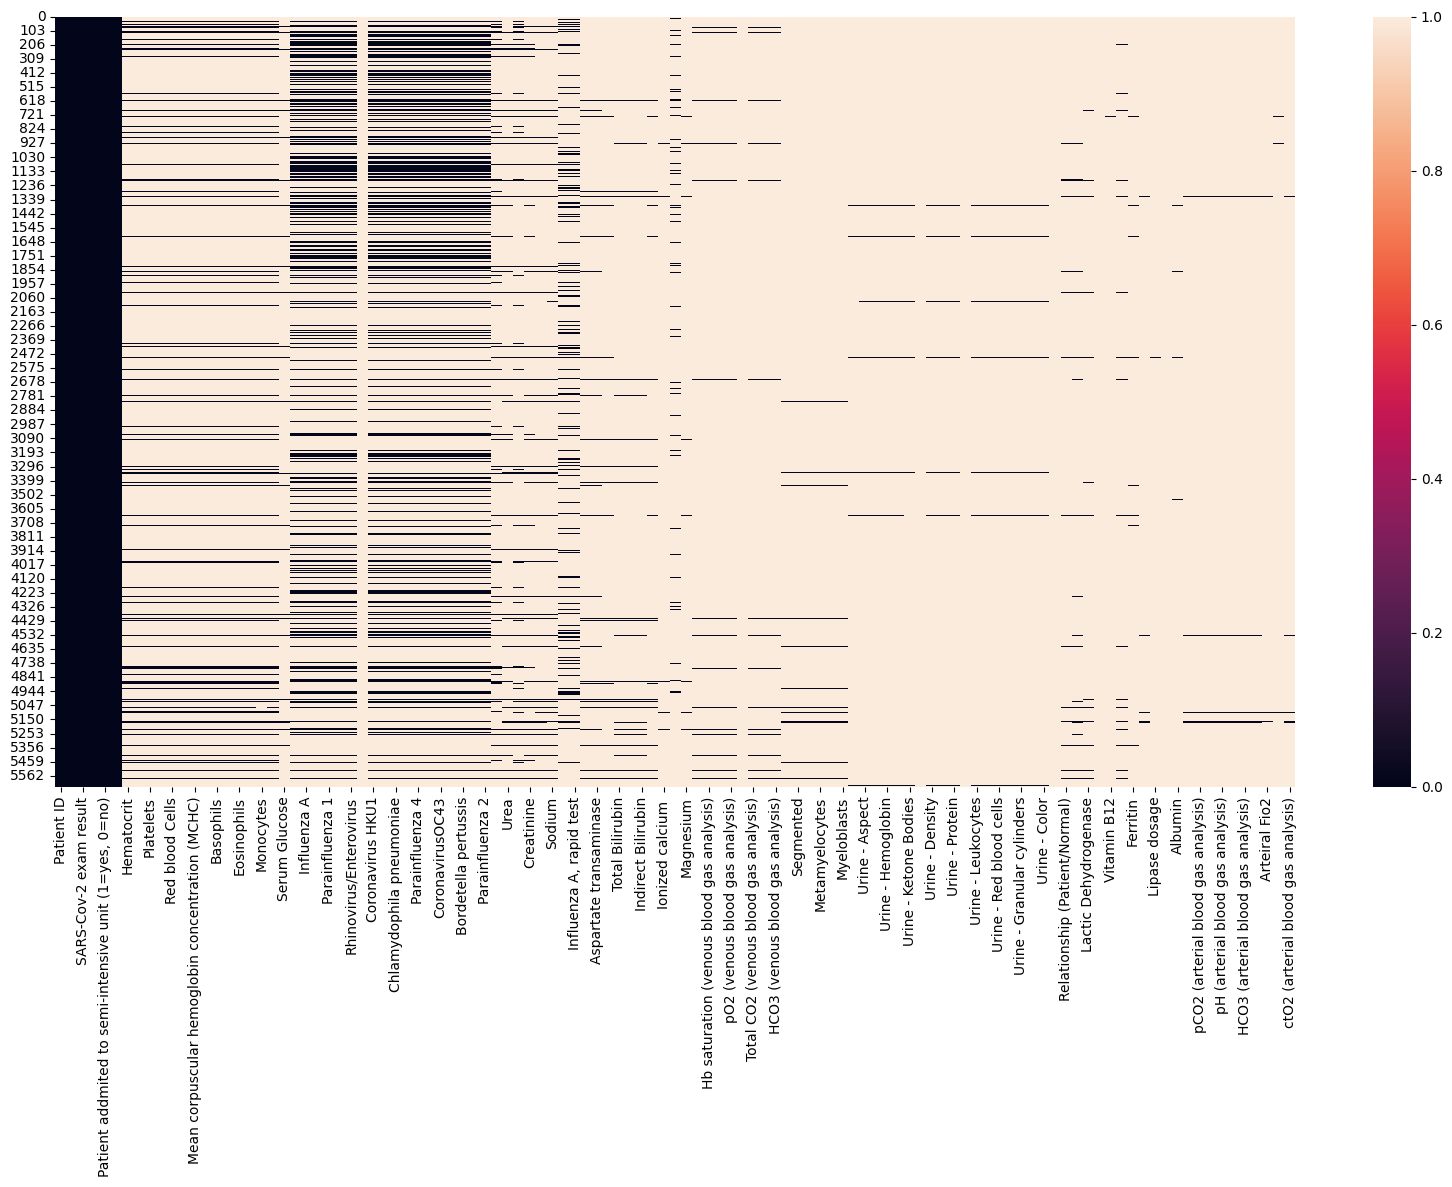

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [25]:
# Visualisation  de pourcentage de valeurs manquantes des variables 

(df.isna().sum()/df.shape[0]).sort_values(ascending = False)

Urine - Sugar                                            1.000000
Mycoplasma pneumoniae                                    1.000000
Partial thromboplastin time (PTT)                        1.000000
Prothrombin time (PT), Activity                          1.000000
D-Dimer                                                  1.000000
Fio2 (venous blood gas analysis)                         0.999823
Urine - Nitrite                                          0.999823
Vitamin B12                                              0.999468
Lipase dosage                                            0.998583
Albumin                                                  0.997697
Phosphor                                                 0.996456
Arteiral Fio2                                            0.996456
Ferritin                                                 0.995925
Arterial Lactic Acid                                     0.995216
ctO2 (arterial blood gas analysis)                       0.995216
Hb saturat

###### Variable target : SARS-Cov-2 exam result
###### lignes et columns : 5644 rows × 111 columns
###### Types de variables : float64 : 70<br>object : 37<br>int64 : 4<br>
###### Identificationes valeurs manquantes : Beaucoup de NaN, 2 groupes de données : 76% -> Test(bacteries, virus, ...) , 89% -> Taux sanguins()

#### Analyse de forme

In [36]:
# Elimination des colonnes qui ont plus de 90% de NaN

df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df

Patient ID  Patient age quantile SARS-Cov-2 exam result   
0     44477f75e8169d2                    13               negative  \
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)   
0                                                  0  \
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)   
0                                                     0      \
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit   
0                                                     0             NaN  \
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells   
0            NaN        NaN                    NaN              NaN  \
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

In [49]:
#SUppression de la colonne Patient ID
df = df.drop('Patient ID', axis=1)

In [40]:
# Examination de la variable target

df['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

On peut ramrquer que les valeurs ne sont pas équilibrées.<br>
Pour cela on peut utiliser une métric comme le score F1, la sensibilité ou la précision

#### SIgnification des variables

/var/folders/2p/6cqhn5c57f5dsfk6qvwwpc700000gn/T/ipykernel_75238/2777817021.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

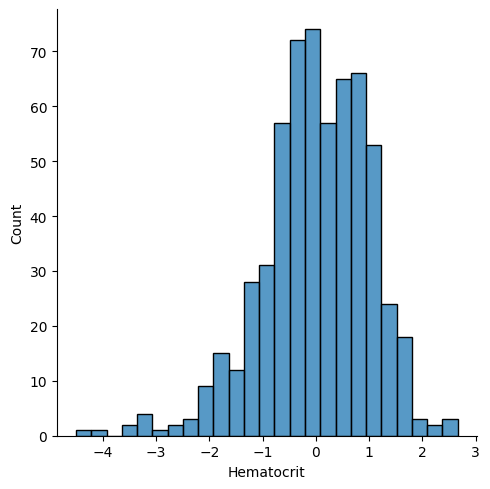

<Figure size 640x480 with 0 Axes>

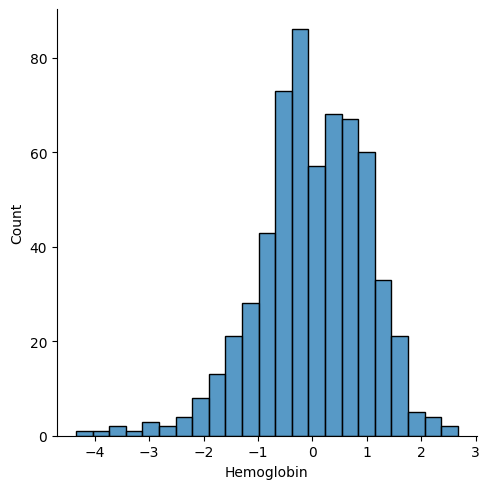

<Figure size 640x480 with 0 Axes>

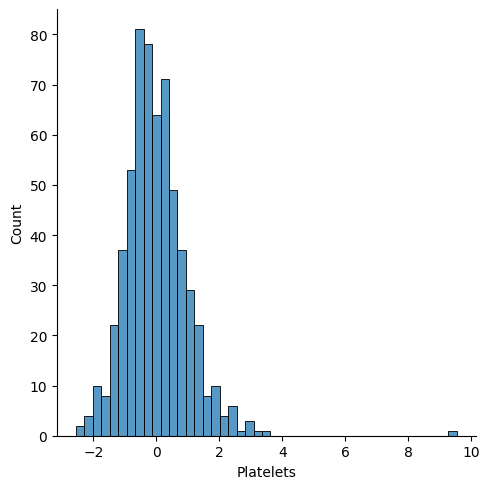

<Figure size 640x480 with 0 Axes>

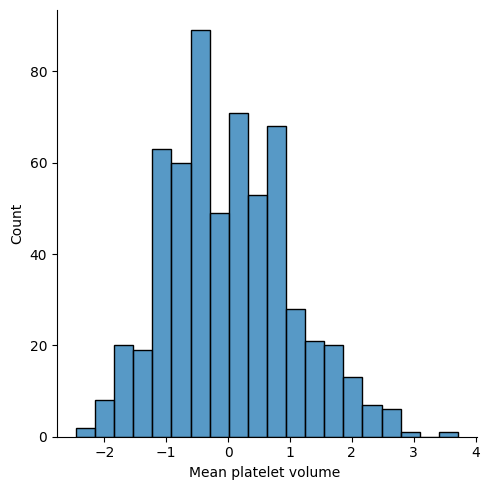

<Figure size 640x480 with 0 Axes>

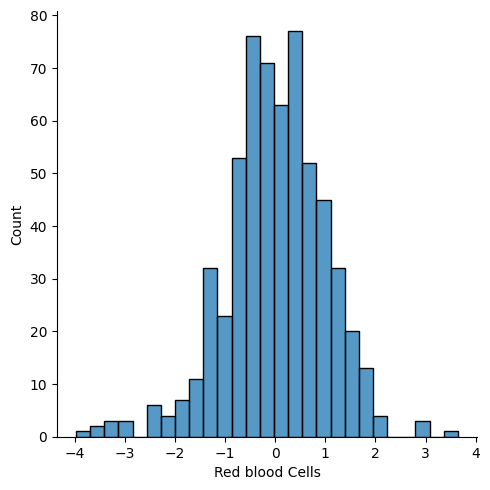

<Figure size 640x480 with 0 Axes>

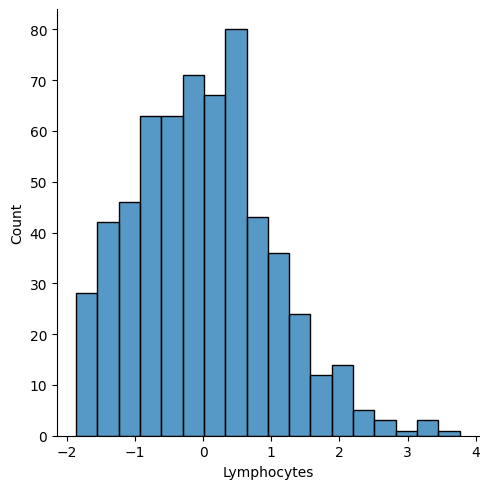

<Figure size 640x480 with 0 Axes>

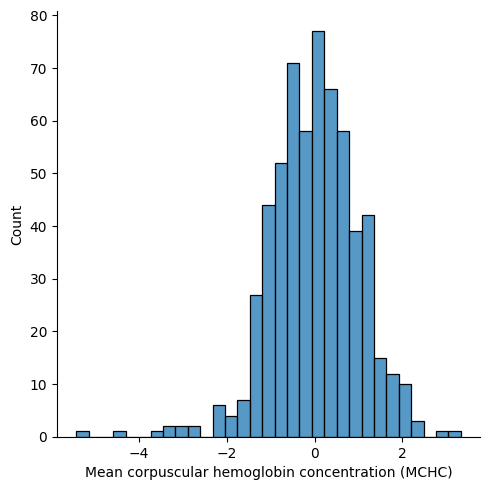

<Figure size 640x480 with 0 Axes>

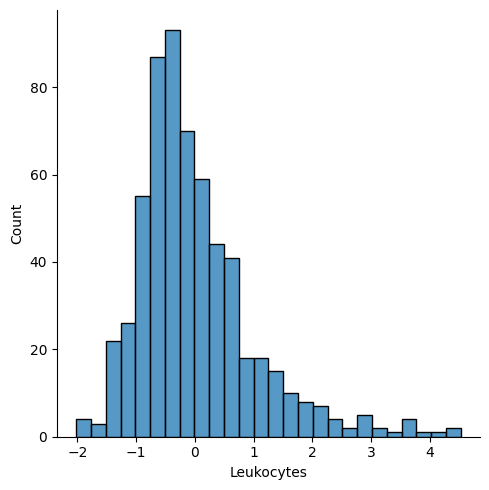

<Figure size 640x480 with 0 Axes>

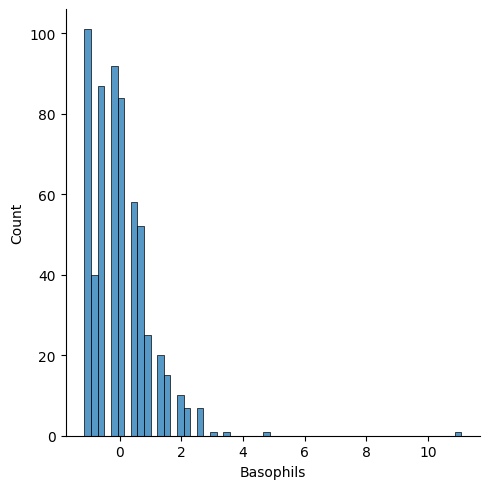

<Figure size 640x480 with 0 Axes>

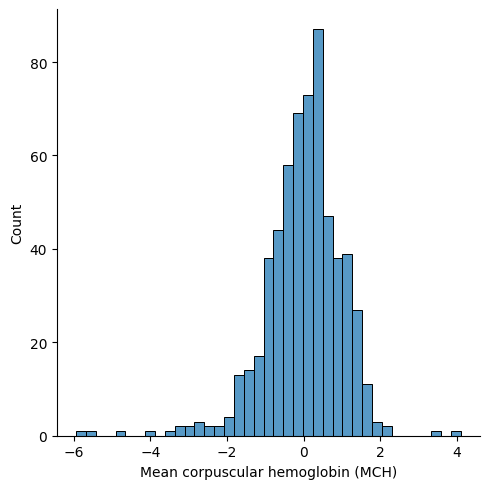

<Figure size 640x480 with 0 Axes>

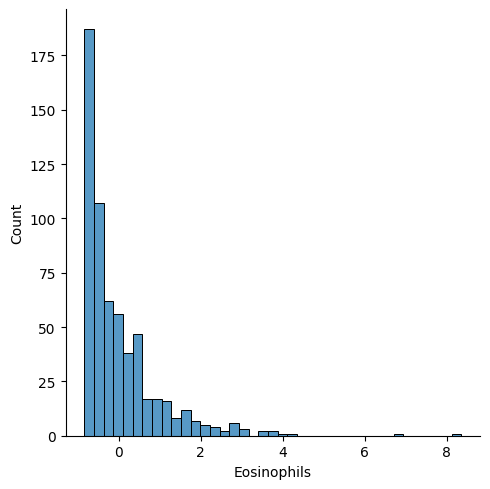

<Figure size 640x480 with 0 Axes>

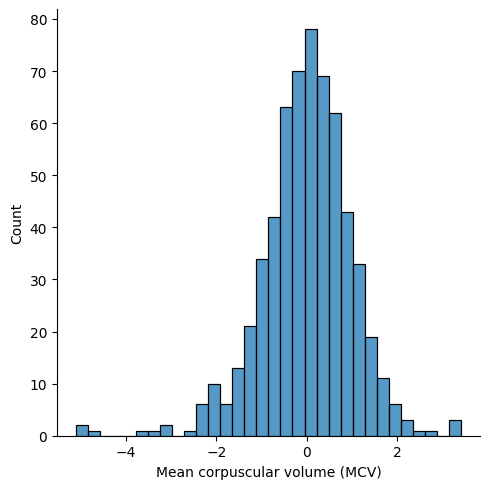

<Figure size 640x480 with 0 Axes>

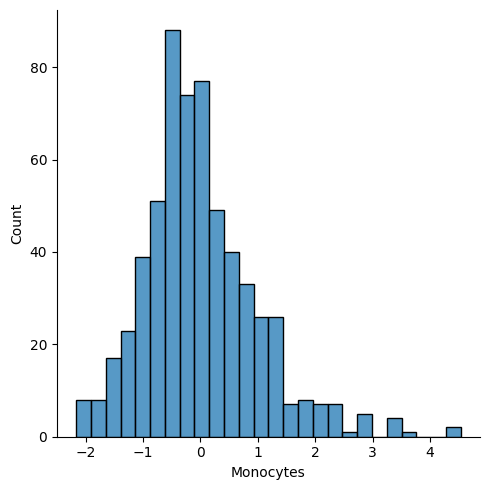

<Figure size 640x480 with 0 Axes>

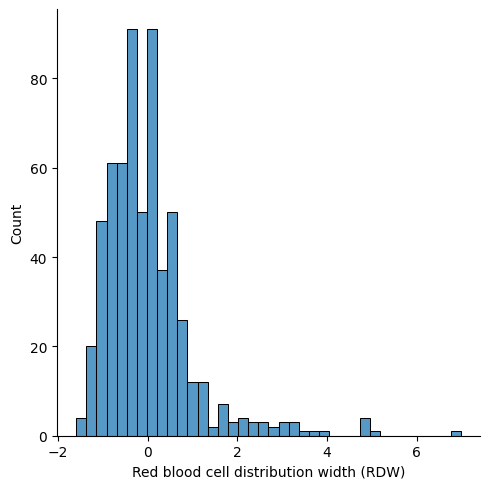

In [43]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])

Les variables continus(Les Test sanguins) sont standardisées, asymétriques 

SARS-Cov-2 exam result
Respiratory Syncytial Virus
Influenza A
Influenza B
Parainfluenza 1
CoronavirusNL63
Rhinovirus/Enterovirus
Coronavirus HKU1
Parainfluenza 3
Chlamydophila pneumoniae
Adenovirus
Parainfluenza 4
Coronavirus229E
CoronavirusOC43
Inf A H1N1 2009
Bordetella pertussis
Metapneumovirus
Parainfluenza 2
Influenza B, rapid test
Influenza A, rapid test


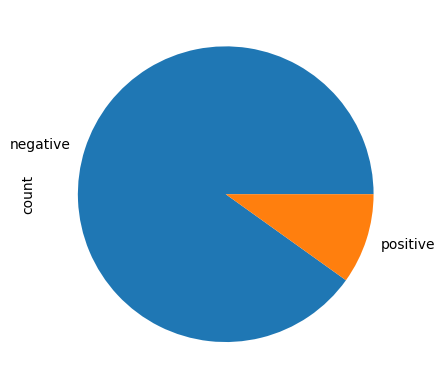

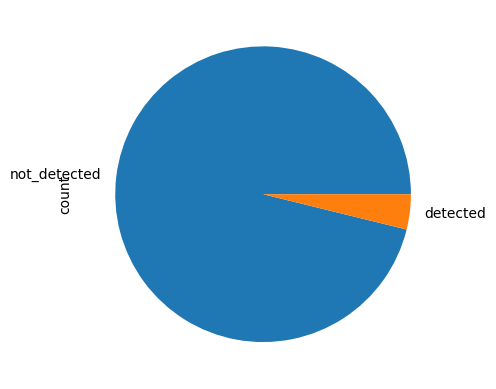

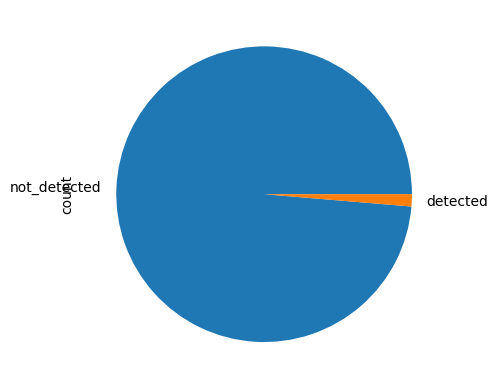

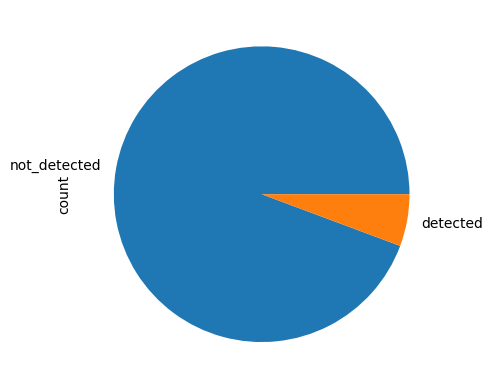

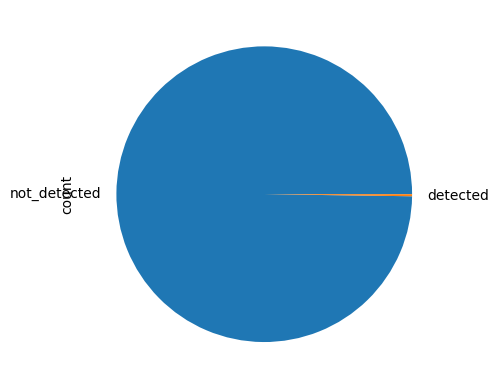

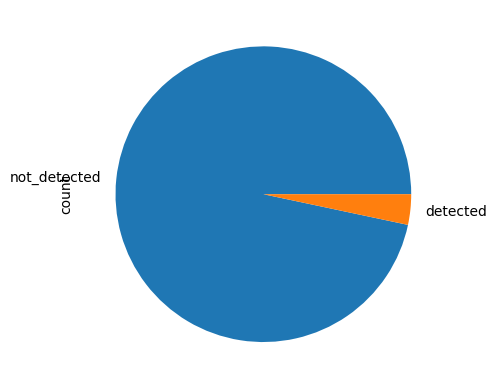

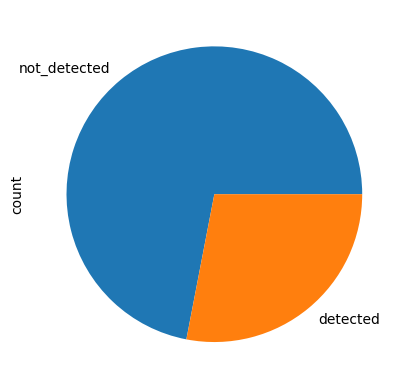

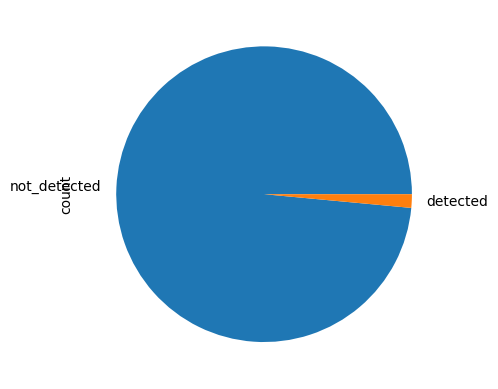

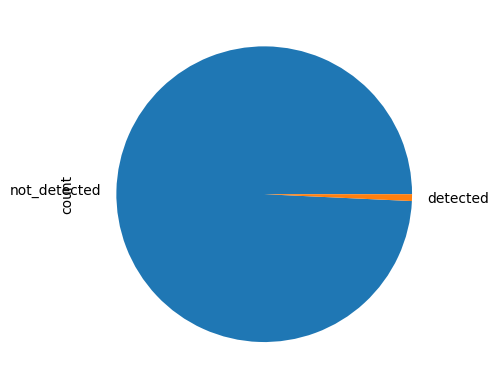

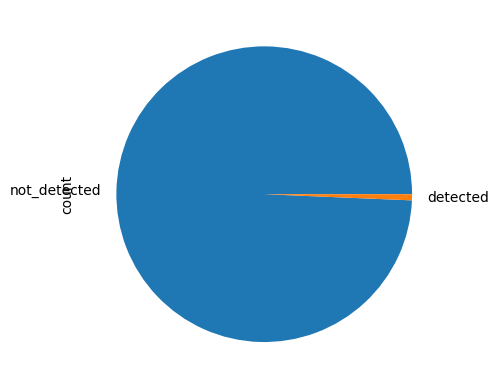

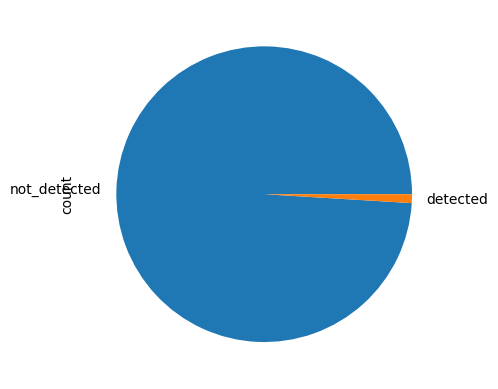

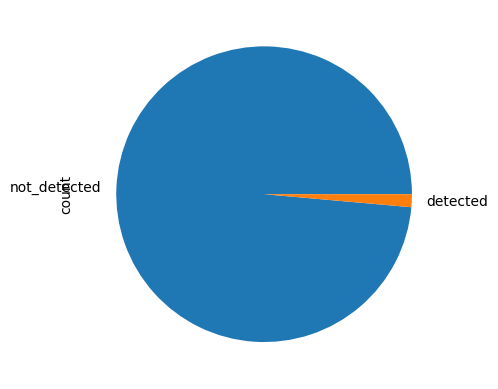

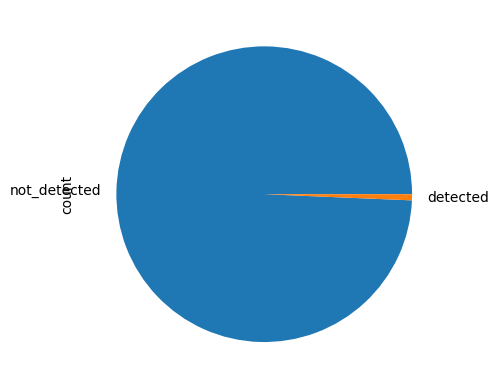

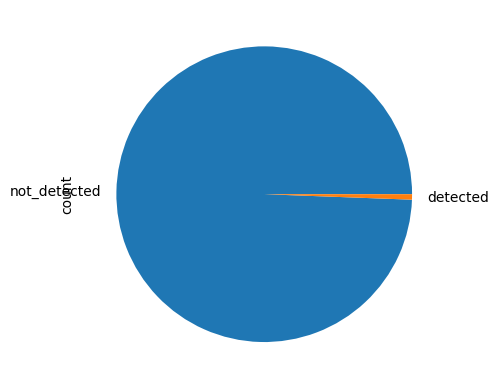

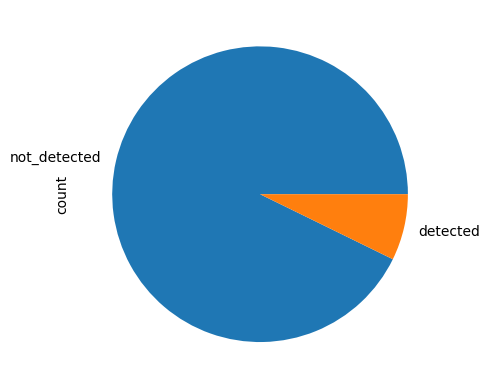

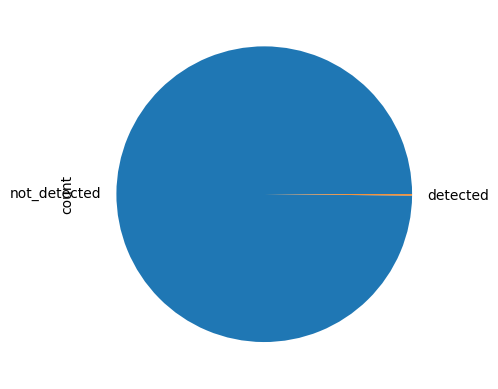

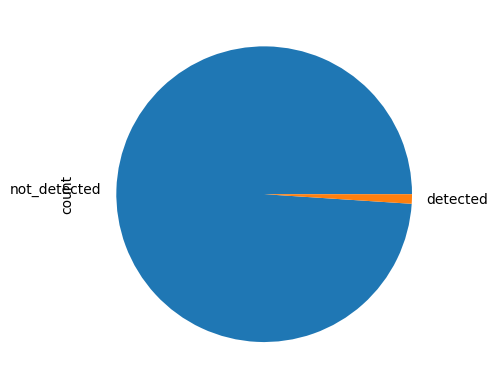

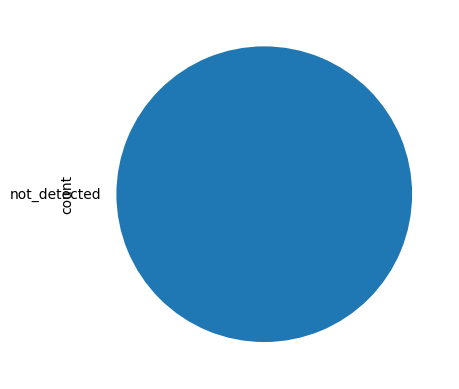

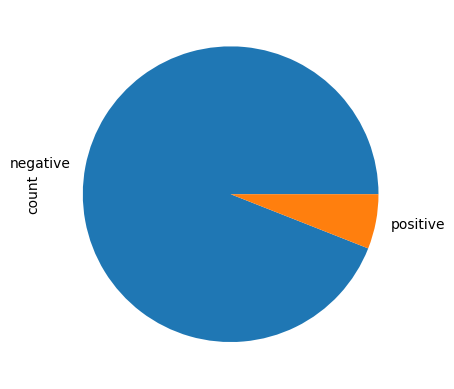

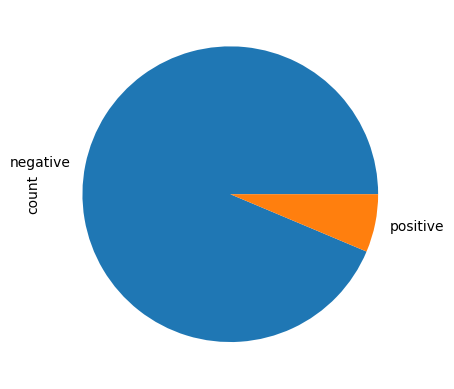

In [64]:
# Affichage des variables de types categoriel
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()


Les variables qualitatives elles sont toutes bianires (0,1)
Le Rhinovirus qui semble très élevé

#### Relation entre variable et target

In [69]:
# Création des sous ensemble positif et negatif
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

Patient age quantile SARS-Cov-2 exam result   
0                       13               negative  \
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5637                    12               negative   
5638                    14               negative   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   

      Patient addmited to regular ward (1=yes, 0=no)   
0                                                  0  \
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5637                                               0   
5638                                               0   
5640                                               0   
5641                                               0   
5642                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)   
0                                                     0      \
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5637                                                  0       
5638                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit   
0                                                     0             NaN  \
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5637                                                  0             NaN   
5638                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells   
0            NaN        NaN                    NaN              NaN  \
1       -0.02234  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5637         NaN        NaN                    NaN              NaN   
5638         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)   
0             NaN                                               NaN  \
1        0.318366                          

In [76]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Mean platelet volume                                     0.893870
Monocytes                                                0.893515
Eosinophils                                              0.893338
Mean corpuscular hemoglobin (MCH)                        0.893338
Red blood cell distribution width (RDW)                  0.893338
Mean corpuscular volume (MCV)                            0.893338
Platelets                                                0.893338
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Influenza A, rapid test                                  0.854713
Influenza 

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [80]:
# Création des sous ensemble blodd et viral
blood_columns =  df.columns[(df.isna().sum()/df.shape[0] > 0.88) & (df.isna().sum()/df.shape[0] < 0.9)]
viral_columns =  df.columns[(df.isna().sum()/df.shape[0] > 0.75) & (df.isna().sum()/df.shape[0] < 0.88)]

#### Difference entre un sang positif et un négatif

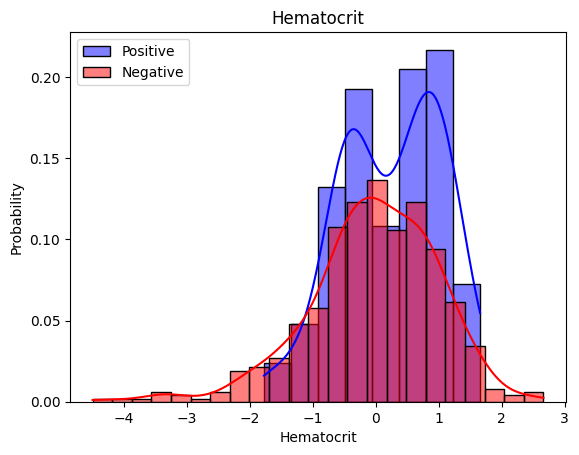

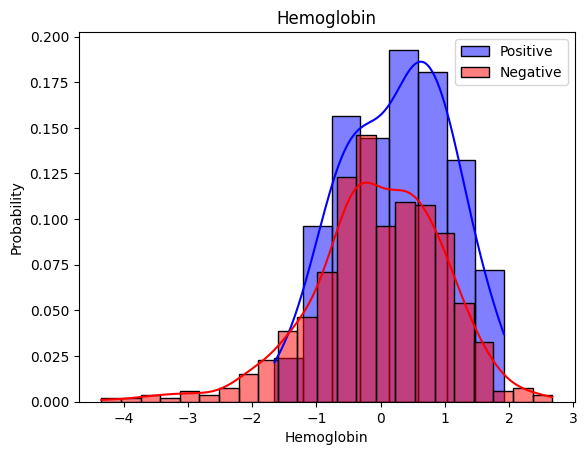

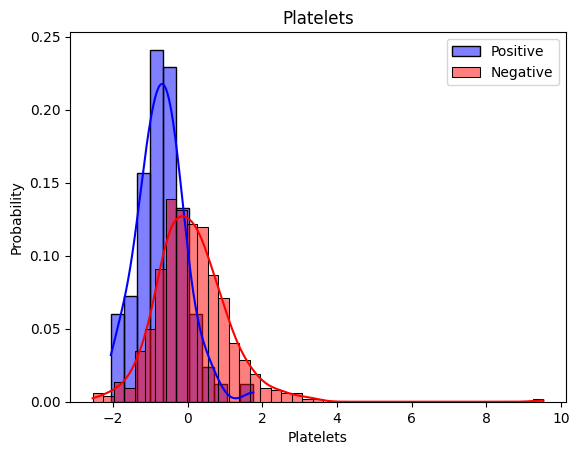

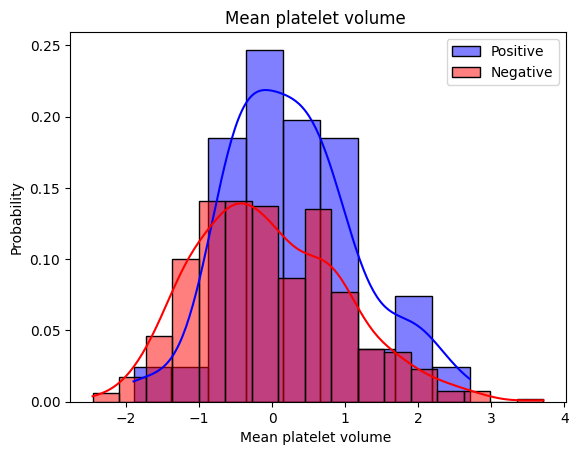

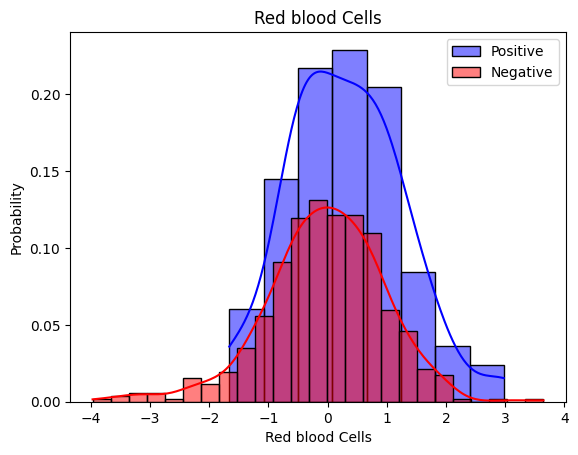

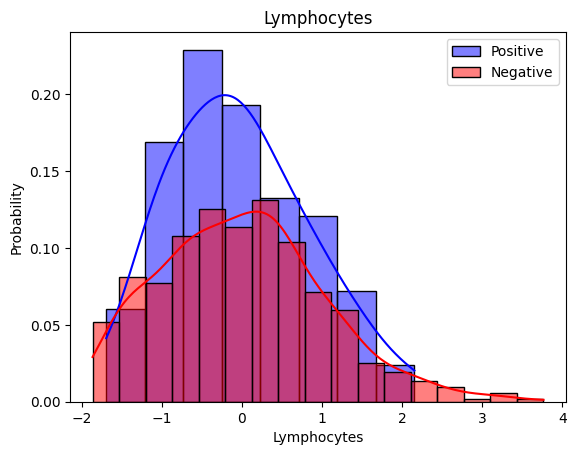

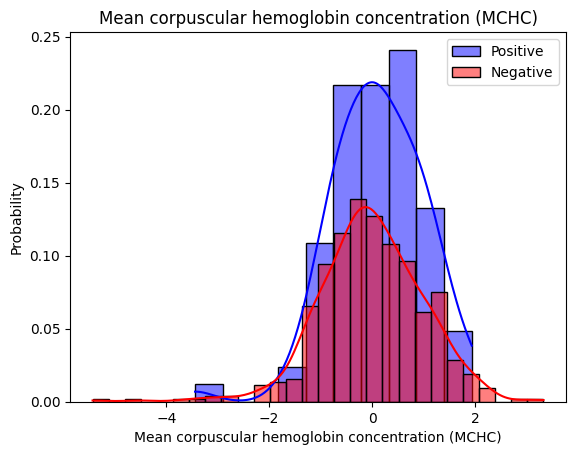

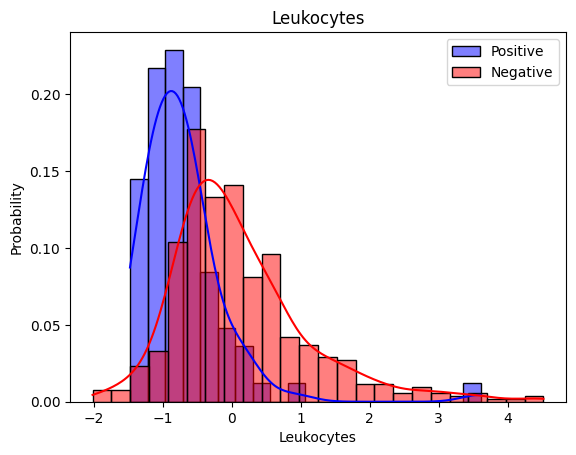

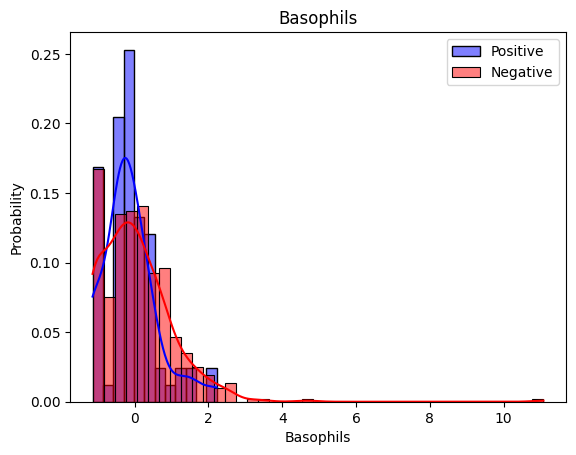

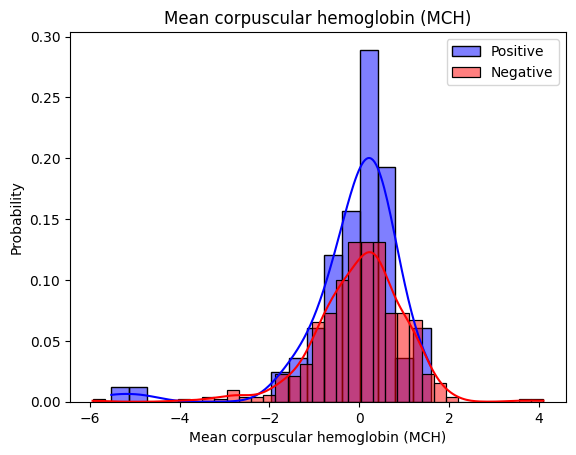

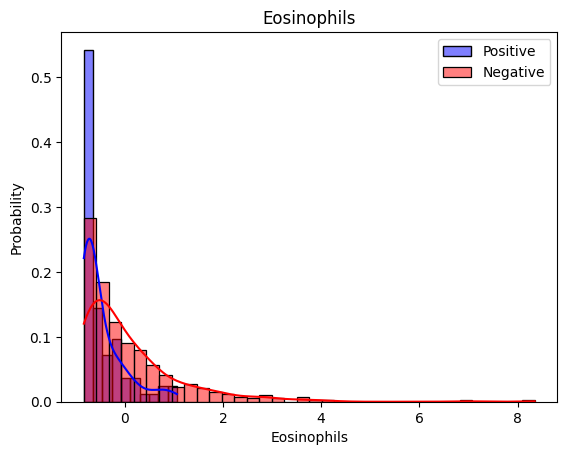

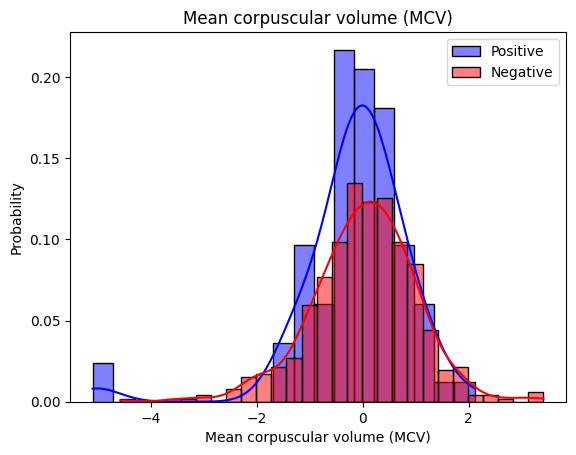

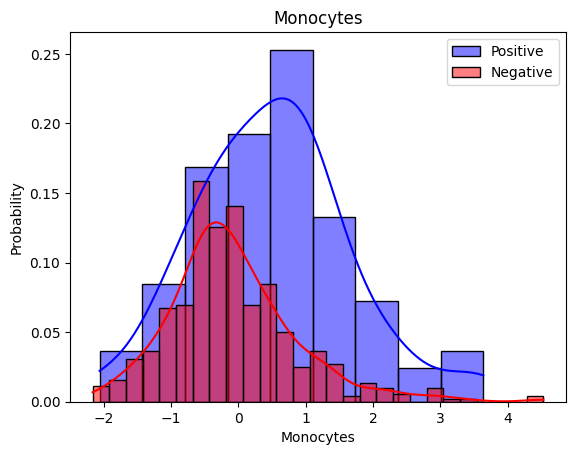

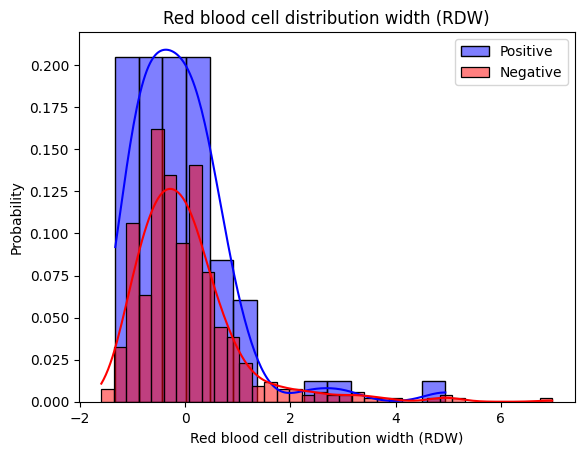

In [89]:
for col in blood_columns:
    plt.figure()
    sns.histplot(positive_df[col], label='Positive', kde=True, color='blue', stat="probability")
    sns.histplot(negative_df[col], label='Negative', kde=True, color='red', stat="probability")
    plt.legend()
    plt.title(col)
    plt.show()

Nous pouvons remarquer que: Les taux de Monocytes, Platelets, Leukocytes semblent liées au Covid-19

#### Relation Target/Viral

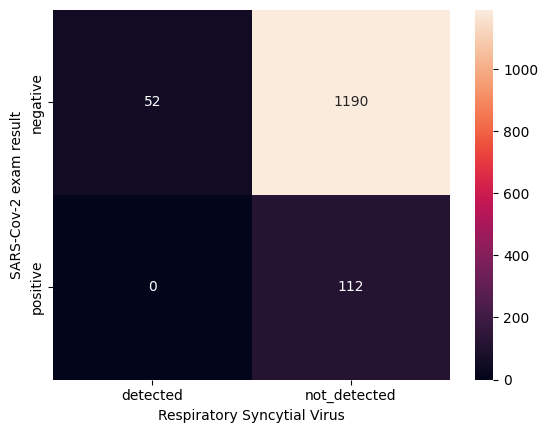

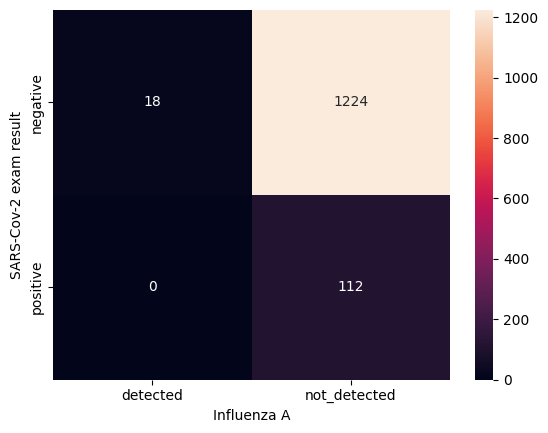

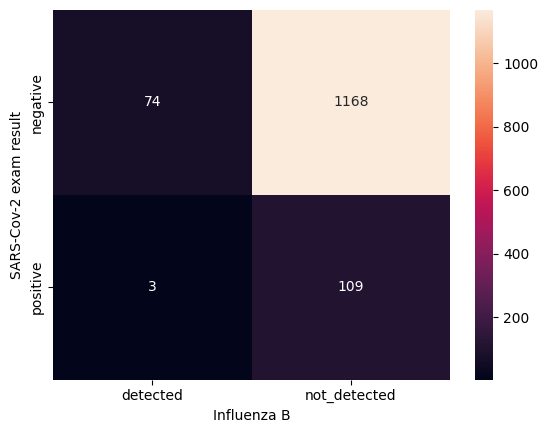

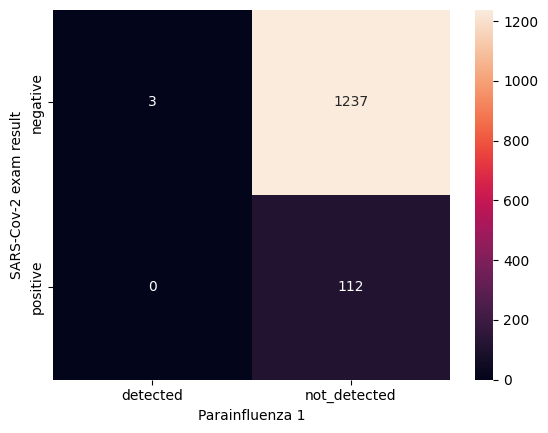

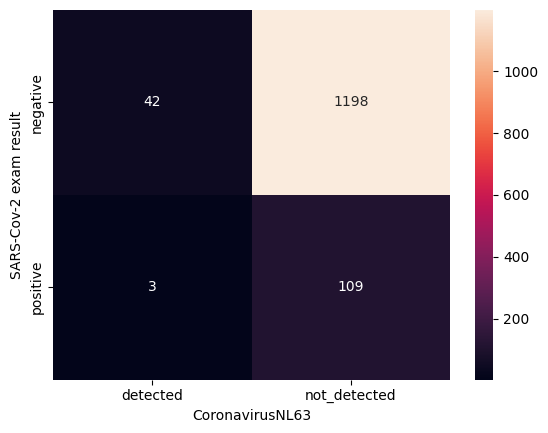

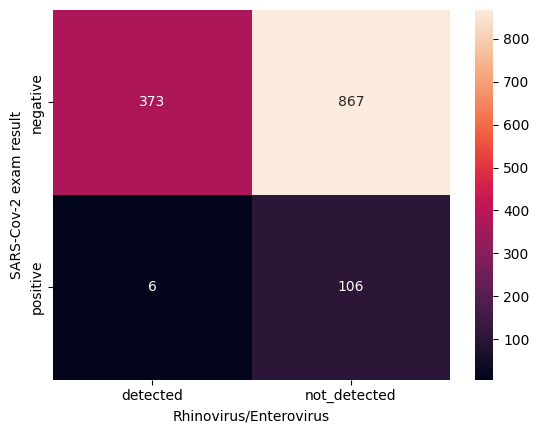

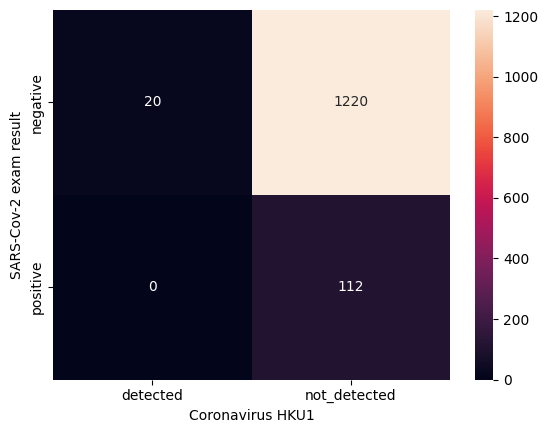

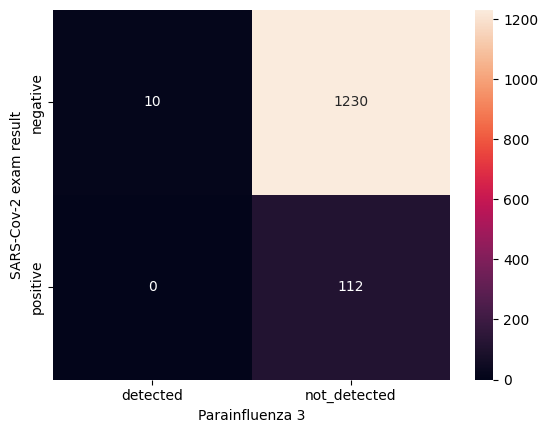

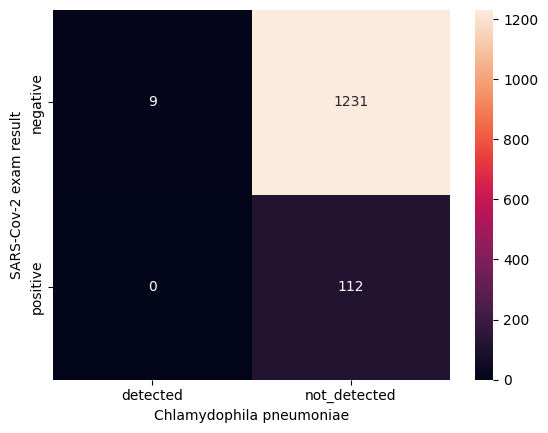

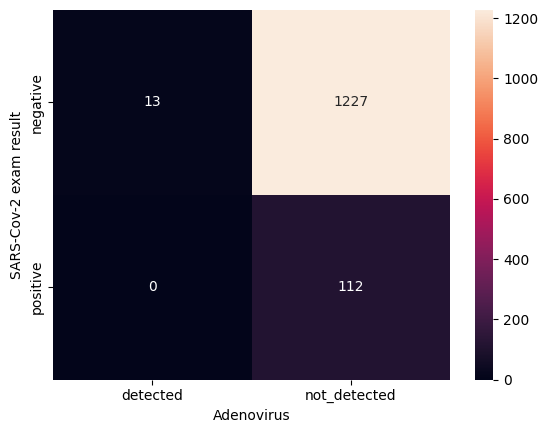

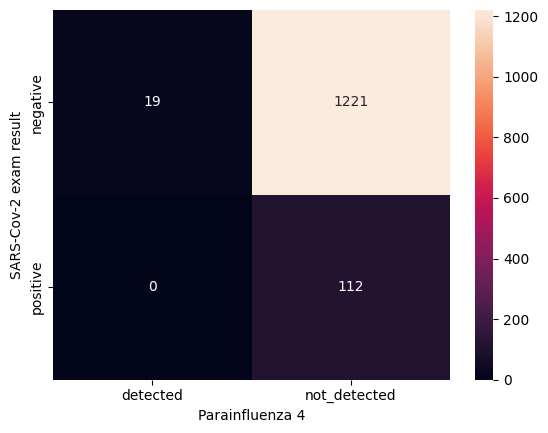

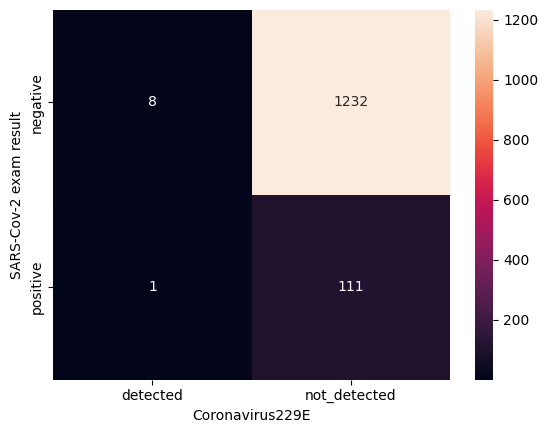

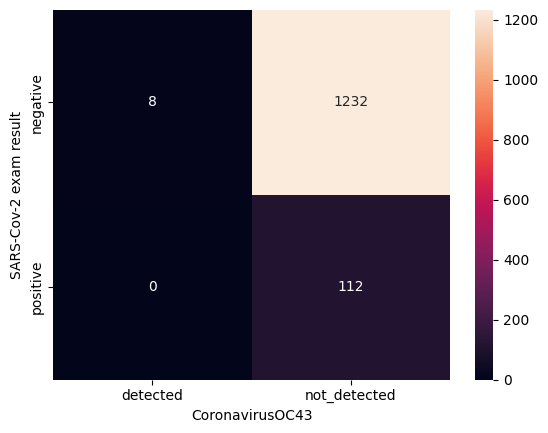

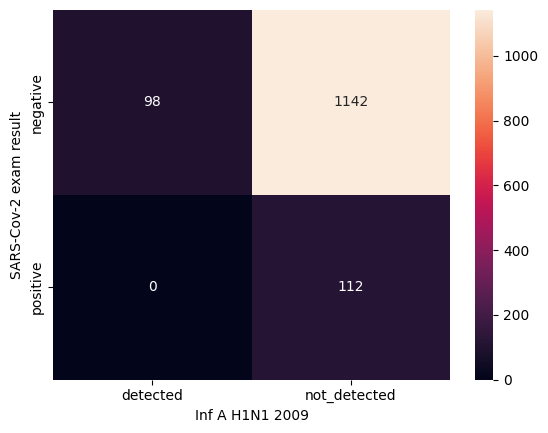

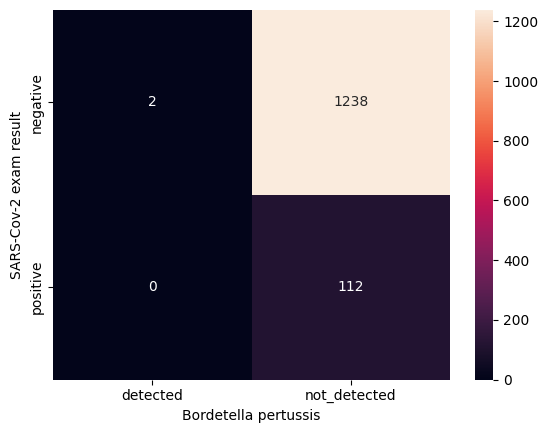

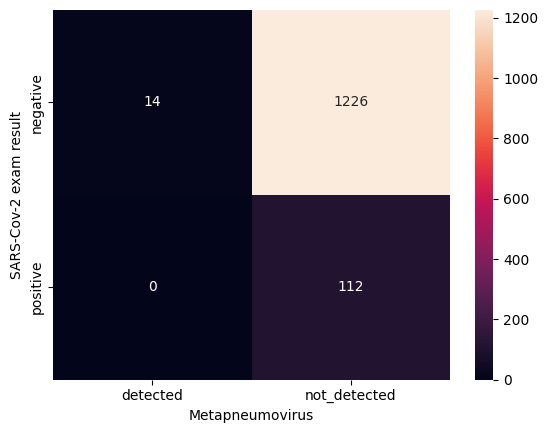

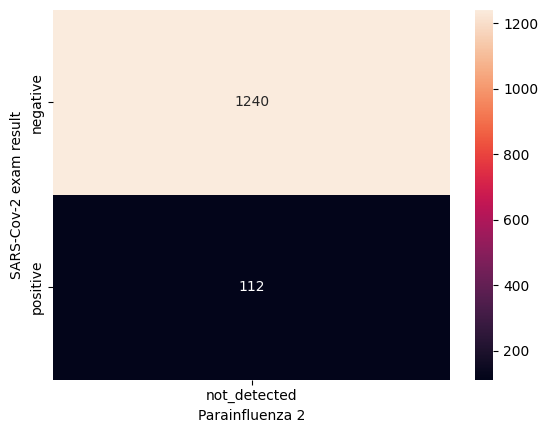

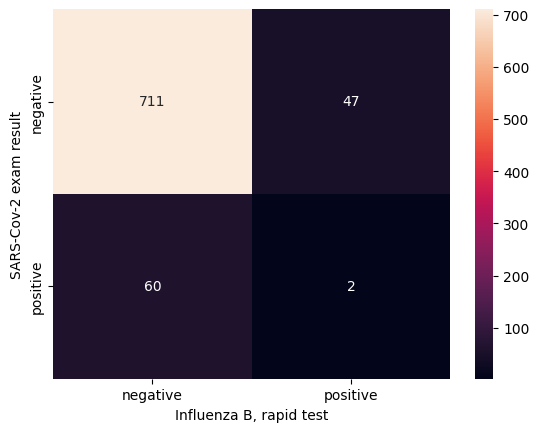

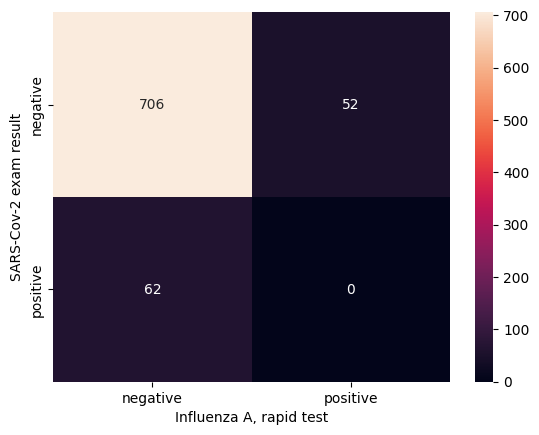

In [91]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

Les doubles maladies sont très rares

### Analyse plus détaillée

#### Relation Variable/Variable

Relations Taux sanguin

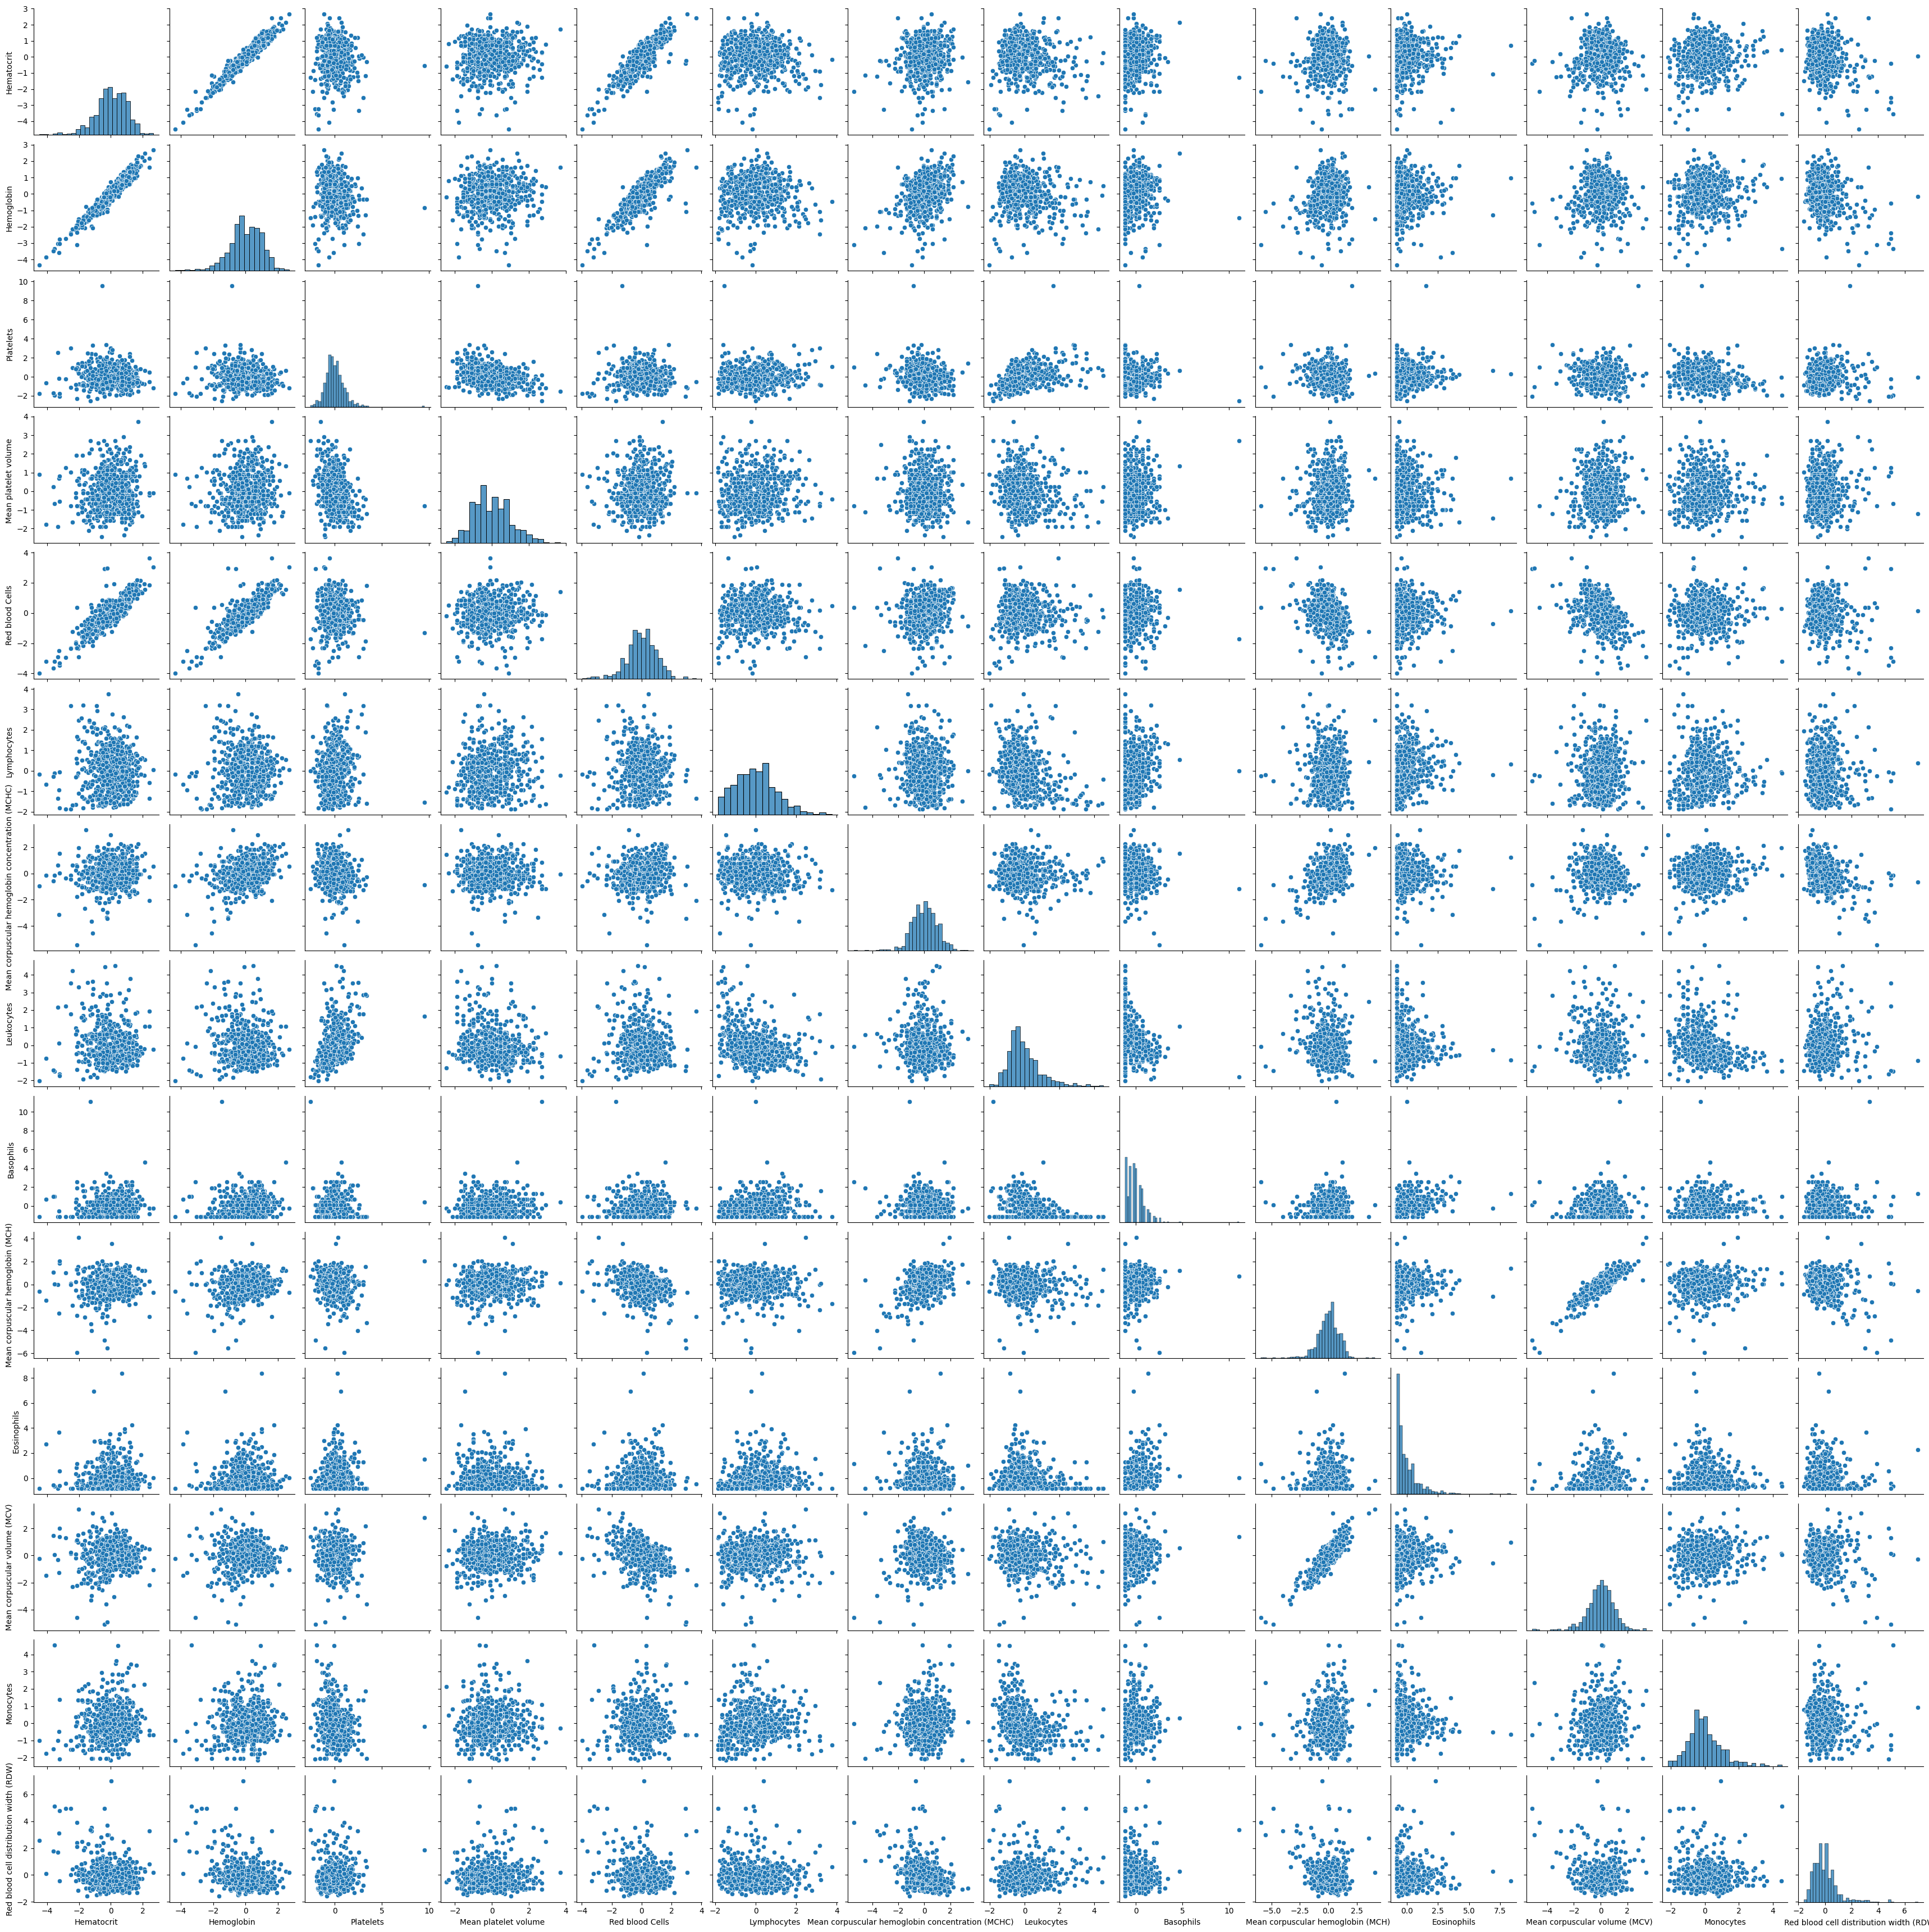

In [92]:
sns.pairplot(df[blood_columns])

<Axes: >

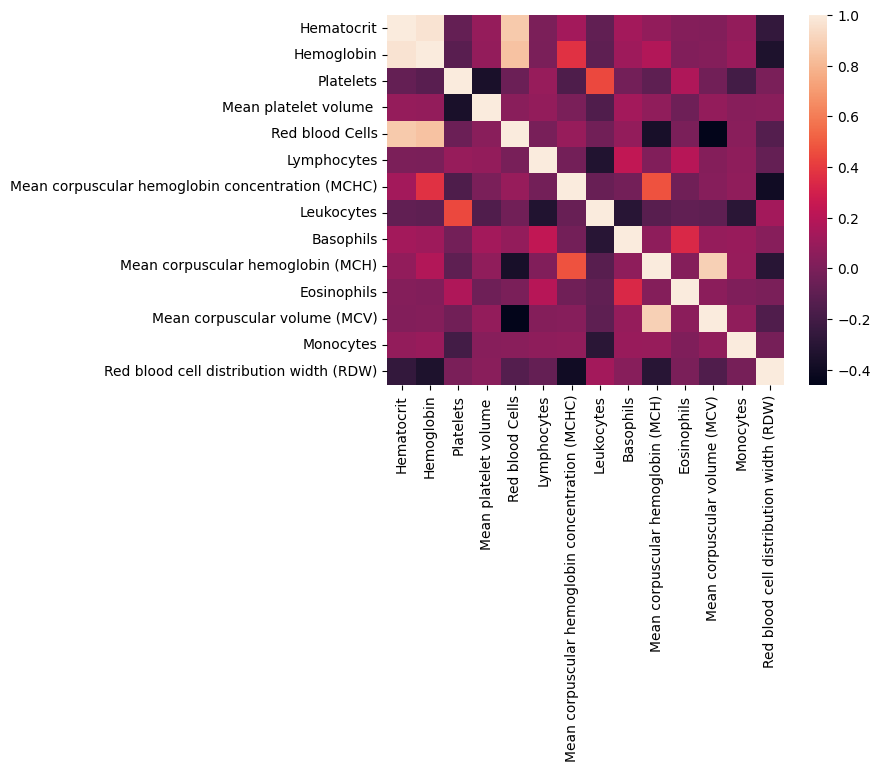

In [93]:
sns.heatmap(df[blood_columns].corr())

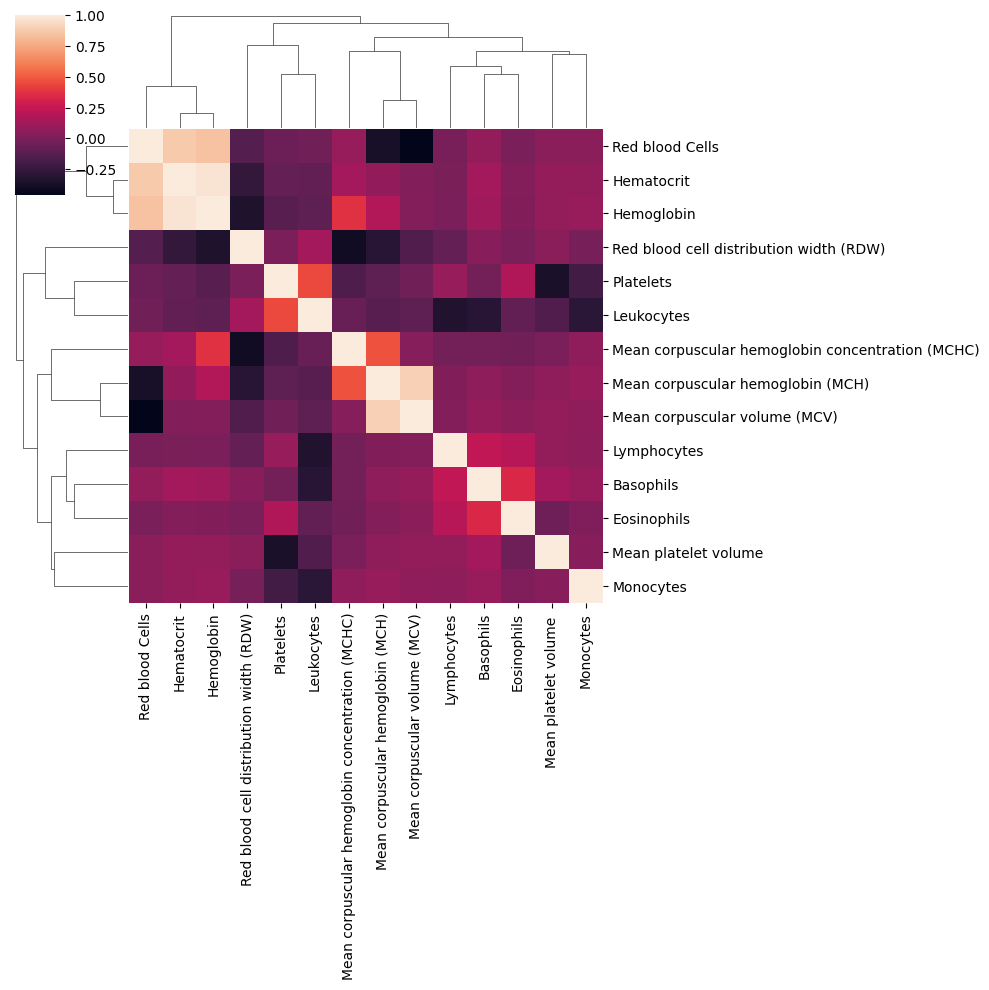

In [94]:
sns.clustermap(df[blood_columns].corr())

Certains variables sont très corrélées > +0.9

#### Relation maladie / blood_data

In [101]:
import numpy as np
#création d'une variable est malade
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis = 1) >= 1


In [102]:
df.head()

Patient age quantile SARS-Cov-2 exam result   
0                    13               negative  \
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)   
0                                               0  \
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)   
0                                                  0      \
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit   
0                                                  0             NaN  \
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes   
0         NaN        NaN                    NaN              NaN          NaN  \
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils   
0                                               NaN         NaN        NaN  \
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils   
0                                NaN          NaN  \
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes   
0                            NaN        NaN  \
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus   
0                                      NaN                         NaN  \
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63   
0           NaN           NaN             NaN             NaN  \
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3   
0                    NaN              NaN             NaN  \
1               detected     not_detected    not_detected   
2           

In [107]:
#creations des columns est malade et non malades
malade_df = df[df['est malade']  == True]
non_malade_df = df[df['est malade']  == False]

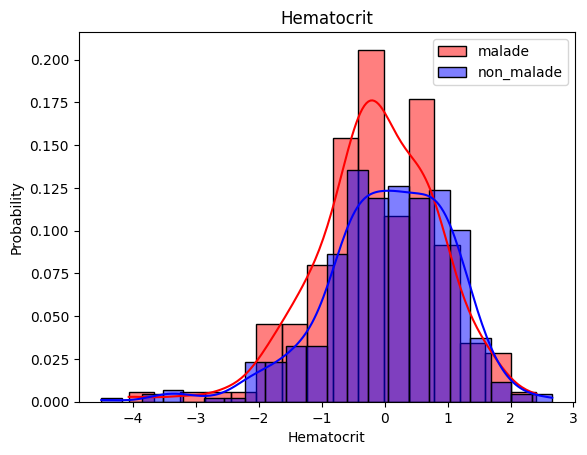

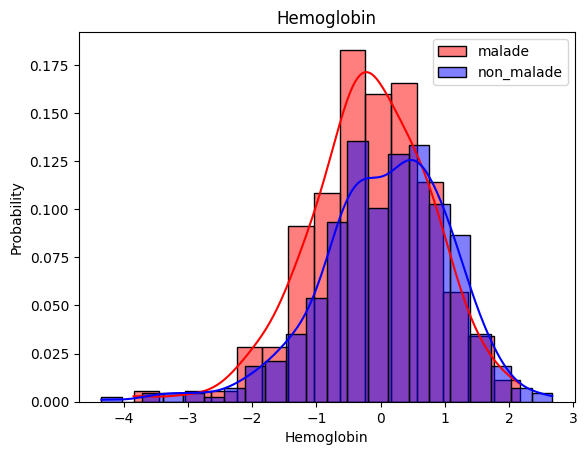

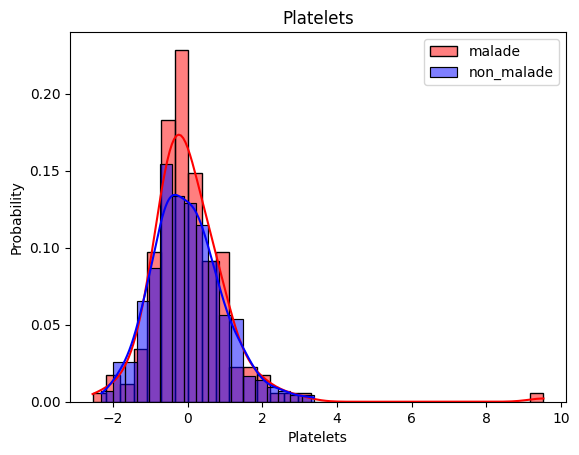

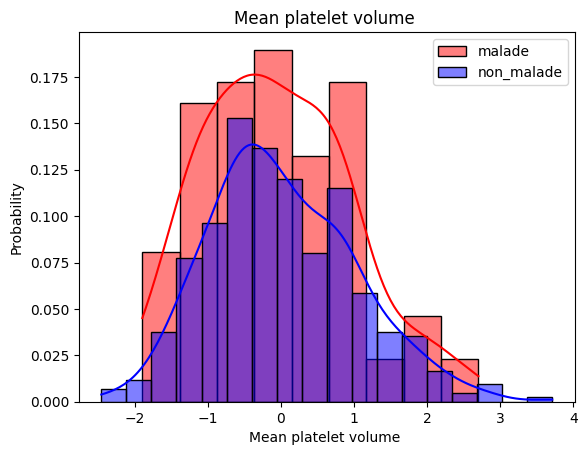

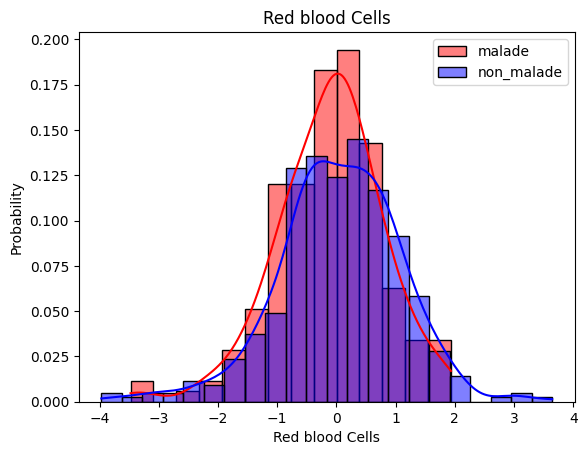

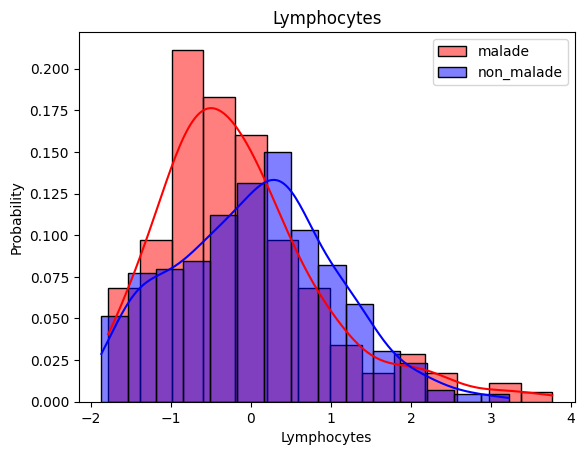

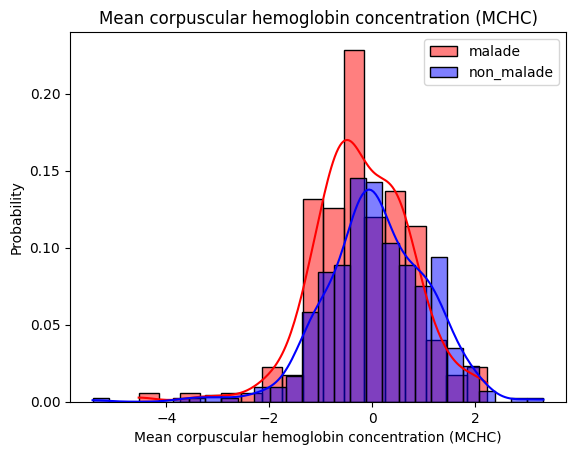

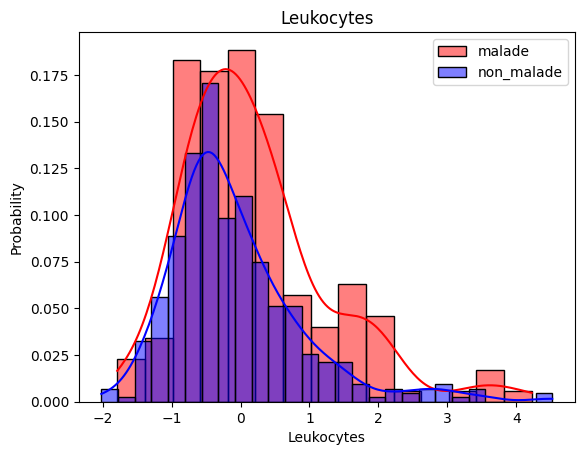

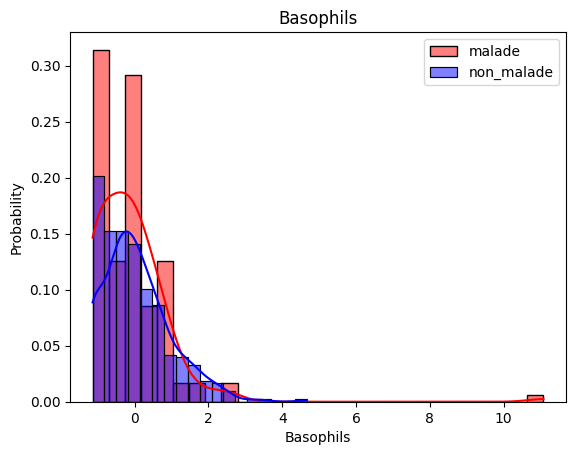

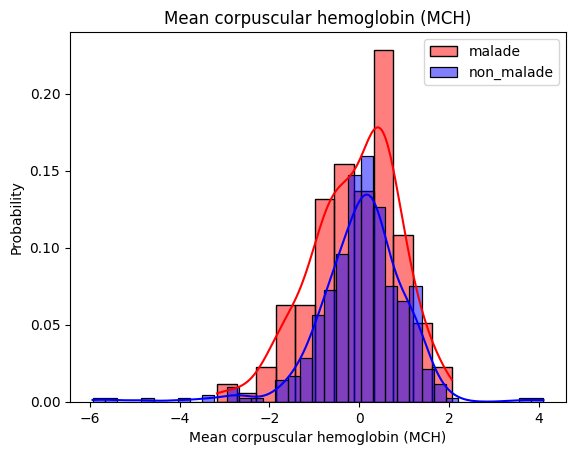

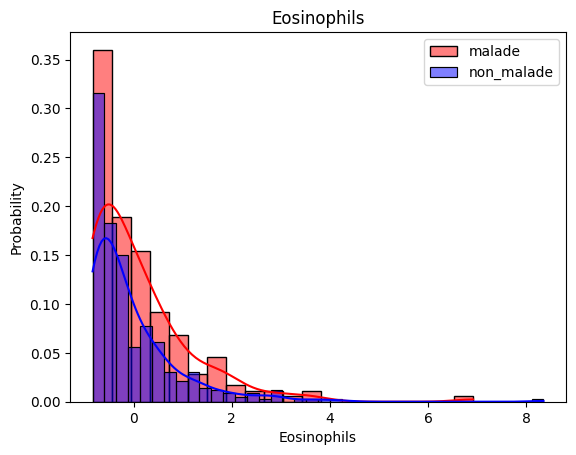

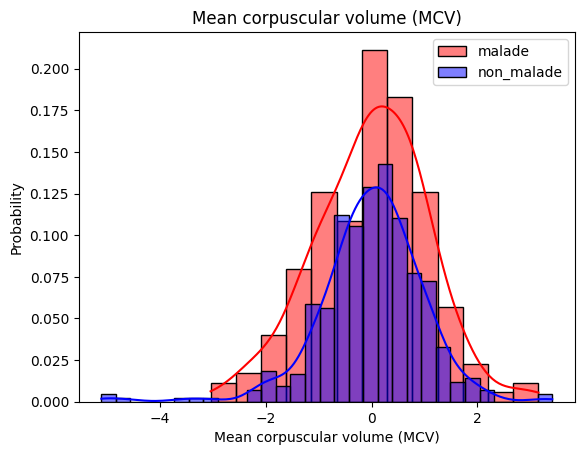

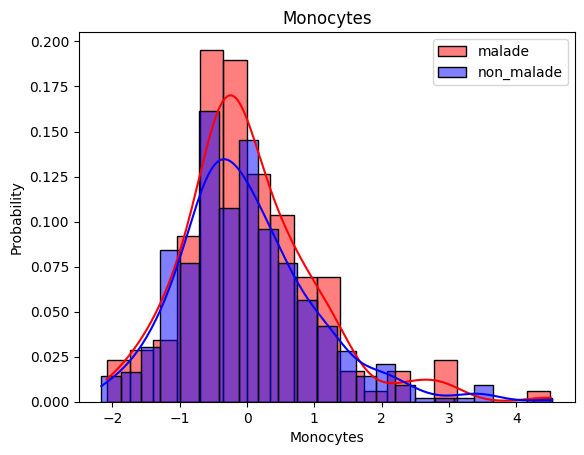

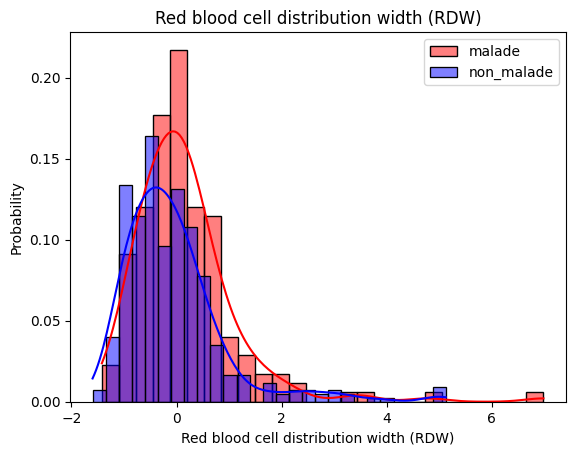

In [109]:
for col in blood_columns :
    plt.figure()
    sns.histplot(malade_df[col],label='malade', kde=True,color = 'red', stat='probability')
    sns.histplot(non_malade_df[col], label='non_malade', kde=True, color='blue', stat = 'probability')
    plt.legend()
    plt.title(col)
    plt.show()


Les taux sanguins entre malades et covid-19 sont différents